# SVM Classifiers

In [27]:
import torch
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
ROOT_PATH='data'

BATCH_SIZE=1000

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR100(root=ROOT_PATH, download=True, train=True, transform=transform)
test_dataset = CIFAR100(root=ROOT_PATH, train=False, transform=transform)

train_data_loader = DataLoader(dataset=train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(dataset=test_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified


In [10]:
for train_data, train_labels in train_data_loader:
    print(train_data.shape)
    print(train_labels.shape)
    break

for eval_data, eval_labels in eval_data_loader:
    print(eval_data.shape)
    print(eval_labels.shape)
    break

torch.Size([4, 3, 32, 32])
torch.Size([4])
torch.Size([4, 3, 32, 32])
torch.Size([4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


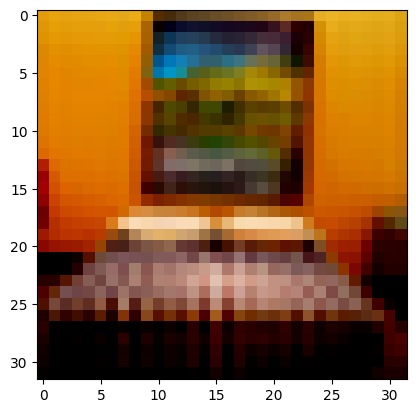

In [24]:
plt.imshow(train_data[3].permute(1,2,0))

In [44]:
def flatten(data_loader):
    images = []
    labels = []

    for img, label in data_loader:
        img = np.array(img)
        img_flat = img.flatten()
        images.append(img_flat)
        labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [45]:
X.shape

(50, 3072000)

In [47]:
y.shape

(50, 1000)

In [46]:
X, y = flatten(train_data_loader)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=41, stratify=[x for x in range(0, 100)])
X_test, y_test = flatten(test_data_loader)

ValueError: Found input variables with inconsistent numbers of samples: [50, 100]

## Linear SVM

In [22]:
from sklearn.svm import SVC

In [26]:
linear_svm = SVC(C=1.0, kernel='linear', probability=False, random_state=41,
                 decision_function_shape='ovr', tol=0.001, max_iter= -1, )